# Tutorial n°4 Lab: Fourier Analysis and Image Filtering

In [218]:
import cv2
import scipy
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from scipy import signal
from scipy.fft import fft, ifft, ifftshift, fftshift, fft2, ifft2

## 4.1

### 4.1.1

In [97]:
a = np.array([2,3,4,5])
b = np.array([2,-3,4,-5])
c = np.array([-9,-8,-7,-6])
d = np.array([-9,8,-7,6])

A = fft(a)
B = fft(b)
C = fft(d)
D = fft(c)

print(f'{A}\n{B}\n{C}\n{D}')

[14.-0.j -2.+2.j -2.-0.j -2.-2.j]
[-2.-0.j -2.-2.j 14.-0.j -2.+2.j]
[ -2.-0.j  -2.-2.j -30.-0.j  -2.+2.j]
[-30.-0.j  -2.+2.j  -2.-0.j  -2.-2.j]


### 4.1.2: Done by hand

### 4.1.3

In [98]:
def check_conv_theorem(a: np.ndarray,b: np.ndarray):
    """
    Compute the convolution of signals a and b, and checks if the result coincides with the inverse
    Fourier Transform (FT) of the product between the FT of the two signal; if so, return True else False.
    Args:
        a (np.ndarray): One 1-D signal array to consider.
        b (np.ndarray): One 1-D signal array to consider.
    Return:
        (bool)
    """
    pad = np.zeros((len(a)+len(b)-1))
    a_p, b_p = pad, pad
    a_p[-len(a):] = a
    b_p[-len(b):] = b
    
    A = fft(a_p)
    B = fft(b_p)
    g = ifftshift(ifft(A*B))
    r_g = np.round(np.real(g), 0).astype(int)
    c_s = np.round(scipy.ndimage.convolve1d(a_p,b_p,mode='wrap')).astype(int)
    print(f'Convolution result: {c_s} \n')
    print(f'IDFT(DFT(a)DFT(b)) result: {r_g} \n')
    dif = np.abs(r_g - c_s)
    return not dif.all()

In [6]:
a = np.array([7,6,5,4,-4,-5,-6,-7])
b = np.array([2,2,-5,-5,6,6,-7,-7])
message = 'The thorem is confirmed' if check_conv_theorem(a,b) else 'The theorem is not confirmed \n'
print(message)

Convolution result: [  18  212   22 -168  -35   98   49    4    8  -16  -40   29   98  -39
 -176] 

IDFT(DFT(a)DFT(b)) result: [  18  212   22 -168  -35   98   49    4    8  -16  -40   29   98  -39
 -176] 

The thorem is confirmed


In [7]:
a = np.array([2,-3,5,6,-2,-1,3,7])
b = np.array([-1,5,6,4,-3,-5,1,2])
message = 'The theorem is confirmed' if check_conv_theorem(a,b) else 'The theorem is not confirmed \n'
print(message)

Convolution result: [  1  62  35 -22 -19   4   4   1 -10  13  52  82  28 -72 -78] 

IDFT(DFT(a)DFT(b)) result: [  1  62  35 -22 -19   4   4   1 -10  13  52  82  28 -72 -78] 

The theorem is confirmed


## 4.2

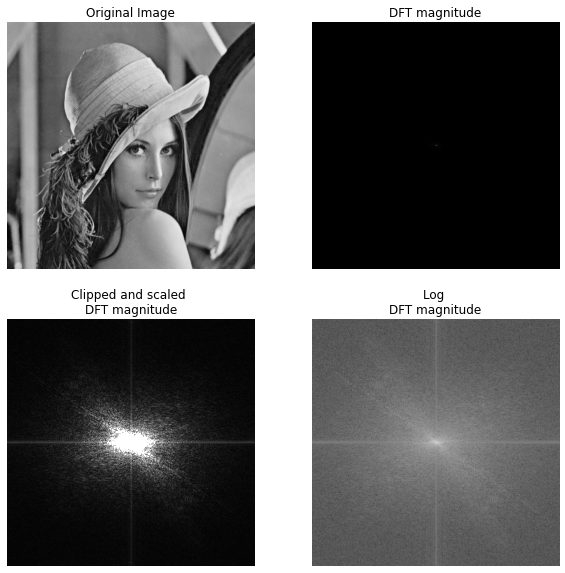

In [187]:
im = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
I = scipy.fft.fftshift(scipy.fft.fft2(im))
I_mag = np.absolute(I)

fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].set_title('Original Image')
ax[0,0].imshow(im, cmap='gray')
ax[0,0].axis('off')

ax[0,1].set_title('DFT magnitude')
ax[0,1].imshow(I_mag, cmap='gray')
ax[0,1].axis('off')

ax[1,0].set_title('Clipped and scaled \nDFT magnitude')
ax[1,0].imshow(I_mag, cmap='gray', vmin=1.5*I_mag.min(), vmax=I_mag.max()*1.5e-3)
ax[1,0].axis('off')

ax[1,1].set_title('Log \nDFT magnitude')
ax[1,1].imshow(np.log(1+I_mag), cmap='gray')
ax[1,1].axis('off')
plt.show()

## 4.3

### 4.3.A

In [321]:
def adj_range(im: np.ndarray, alpha: float = im.min(), beta: float = im.max()):
    """
    Linearly adjust dynamic range in the image to the range [alpha, beta]
    """
    out = np.zeros(im.shape, np.double)
    return cv2.normalize(im, out, alpha, beta, cv2.NORM_MINMAX)

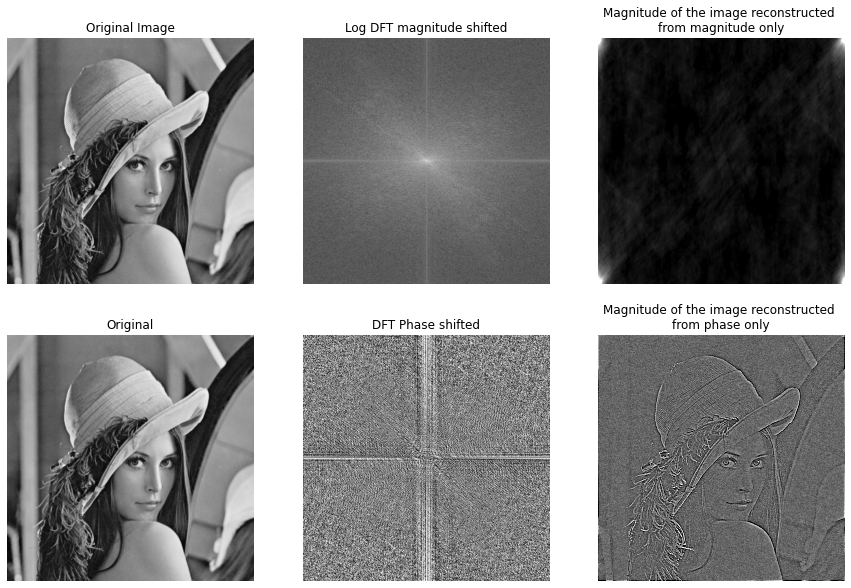

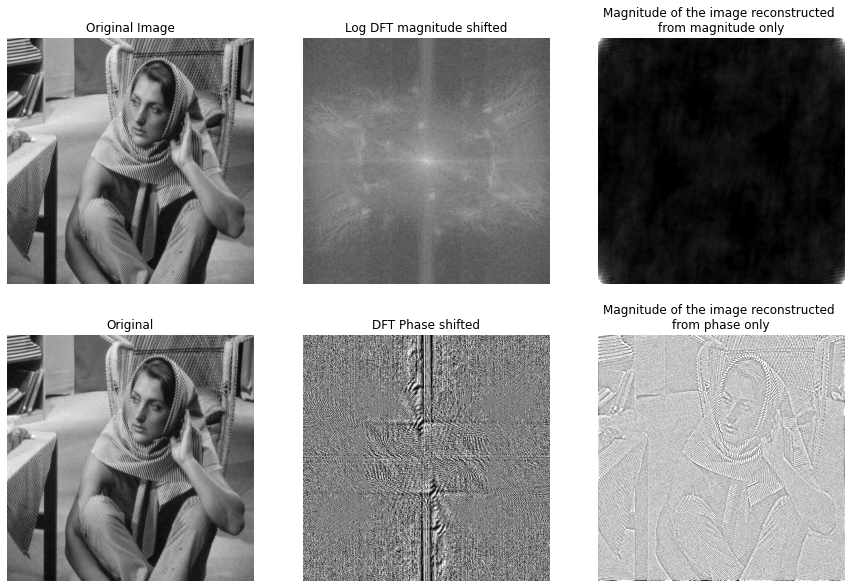

In [334]:
for im_name in ['lena', 'barbara']:
    im = cv2.imread(f'./images/{im_name}.png', cv2.IMREAD_GRAYSCALE)

    I = fft2(im)
    I_mag = np.abs(I)
    I_phase = np.arctan2(np.imag(I), np.real(I))
    I_phase = np.exp(1j*I_phase)

    im_recon_mag = ifft2(I_mag)
    im_recon_phase = ifft2(I_phase)

    im_recon_mag = np.real(im_recon_mag)
    im_recon_phase = np.real(im_recon_phase)

    fig, ax = plt.subplots(2,3, figsize=(15,10))

    ax[0,0].set_title('Original Image')
    ax[0,0].imshow(im, cmap='gray')
    ax[0,0].axis('off')

    ax[0,1].set_title('Log DFT magnitude shifted')
    ax[0,1].imshow(np.log(1+fftshift(I_mag)), cmap='gray')
    ax[0,1].axis('off')

    ax[0,2].set_title('Magnitude of the image reconstructed \nfrom magnitude only')
    ax[0,2].imshow(adj_range(im_recon_mag), cmap='gray', vmin=26, vmax=50)
    ax[0,2].axis('off')

    ax[1,0].set_title('Original')
    ax[1,0].imshow(im, cmap='gray')
    ax[1,0].axis('off')

    ax[1,1].set_title('DFT Phase shifted')
    ax[1,1].imshow(np.real(fftshift(I_phase)), cmap='gray')
    ax[1,1].axis('off')

    ax[1,2].set_title('Magnitude of the image reconstructed \nfrom phase only')
    ax[1,2].imshow(adj_range(im_recon_phase), cmap='gray', vmin=100, vmax=150)
    ax[1,2].axis('off')
    plt.show()

### 4.3.B

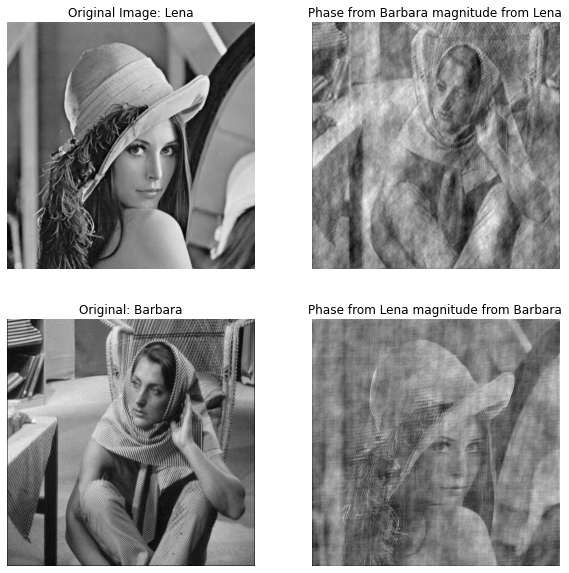

In [344]:
im1 = cv2.imread(f'./images/lena.png', cv2.IMREAD_GRAYSCALE)
im2 = np.zeros((512,512))
im2[1:511,1:511] = cv2.imread(f'./images/barbara.png', cv2.IMREAD_GRAYSCALE)

I1 = fft2(im1)
I1_mag = np.abs(I1)
I1_phase = np.arctan2(np.imag(I1), np.real(I1))
I1_phase = np.exp(1j*I1_phase)

I2 = fft2(im2)
I2_mag = np.abs(I2)
I2_phase = np.arctan2(np.imag(I2), np.real(I2))
I2_phase = np.exp(1j*I2_phase)

cross_1 = I1_mag * I2_phase
cross_2 = I2_mag * I1_phase

im_recon_1 = ifft2(cross_1)
im_recon_2 = ifft2(cross_2)

im_recon_1 = np.real(im_recon_1)
im_recon_2 = np.real(im_recon_2)

fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].set_title('Original Image: Lena')
ax[0,0].imshow(im1, cmap='gray')
ax[0,0].axis('off')

ax[0,1].set_title('Phase from Barbara magnitude from Lena')
ax[0,1].imshow(adj_range(im_recon_1), cmap='gray')#, vmin=26, vmax=50)
ax[0,1].axis('off')

ax[1,0].set_title('Original: Barbara')
ax[1,0].imshow(im2, cmap='gray')
ax[1,0].axis('off')

ax[1,1].set_title('Phase from Lena magnitude from Barbara')
ax[1,1].imshow(adj_range(im_recon_2), cmap='gray')#, vmin=100, vmax=150)
ax[1,1].axis('off')
plt.show()

## 4.4.A

In [427]:
def lpfilter(filt_type: str, m: int, n: int, d0: float, order: int = None):
    """
    Emulates matlab lpfilter function which omputes frequency domain lowpass filters
        h = lpfilter(filt_type, m, n, d0, order) creates the transfer function of
        a lowpass filter, h, of the specified TYPE and size (M-by-N).
        To view the filter as an image or mesh plot, it should be centered
        using h = fftshift(h).
    Args:
        m (int): number of columns.
        n (int): number of rows.
        d0 (float): cutoff distance.
        order (int): order of the filter.
        filt_type (str):
            'ideal': 
                Ideal lowpass filter with cutoff frequency d0 (must be positive)
                'order' not needed.
            'btw':
                Butterworth lowpass filter of order 'order', and cutoff d0.
                The default value for 'order' is 1.0.  d0 must be positive.
            'gaussian':
                Gaussian lowpass filter with cutoff (standard deviation)
                d0 (must be positive). 'order' not needed.
    Returns:
        (np.ndarray, np.ndarray, np.ndarray) x coordinates, y coordinates, 2d filter values.
    """
    
    try:
        assert filt_type in ['ideal','btw','gaussian']
    except ValueError:
        print("Invalid filter type.")
        
    x = np.arange(-(m//2), m-(m//2), 1)
    y = np.arange(-(n//2), n-(n//2), 1)
    xx, yy = np.meshgrid(x, y, sparse=False)

    d = np.sqrt(xx**2 + yy**2)
    
    if filt_type == 'ideal':
        return xx, yy, np.where(d <= d0, 1., 0.)
    
    elif filt_type == 'btw':
        if order is None:
            order = 1
        return xx, yy, 1/(1 + (d/d0)**(2*order))
    
    else:
        return xx, yy, np.exp(-(d**2)/(2*(d0**2)))

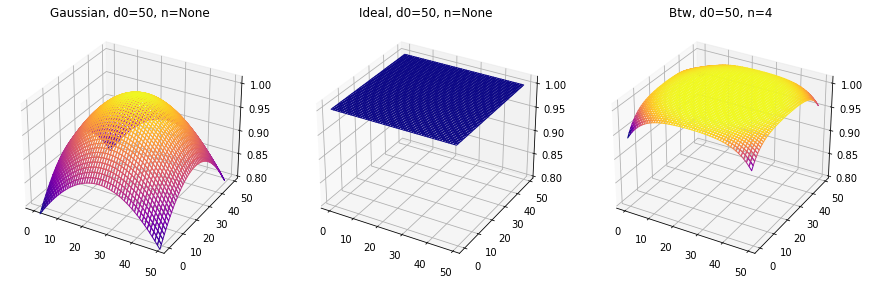

In [440]:
x = np.arange(0,50,1)
y = np.arange(0,50,1)
x, y = np.meshgrid(x,y)

fig = plt.figure(figsize=(15,5))

for k, filter_ in enumerate(['gaussian', 'ideal', 'btw']):
    n = 4 if filter_ == 'btw' else None
    _, _ , z = lpfilter(filter_, 50, 50, 50, n)
    ax = fig.add_subplot(1, 3, k+1, projection='3d')
    norm = plt.Normalize(z.min(), z.max())
    colors = cm.plasma(norm(z))
    rcount, ccount, _ = colors.shape
    surf = ax.plot_surface(x, y, z, rcount=rcount, ccount=ccount, facecolors=colors, shade=False)
    surf.set_facecolor((0,0,0,0))
    ax.set_zlim([0.8,1.01])
    ax.set_title(f'{filter_.capitalize()}, d0={50}, n={n}')
plt.show()

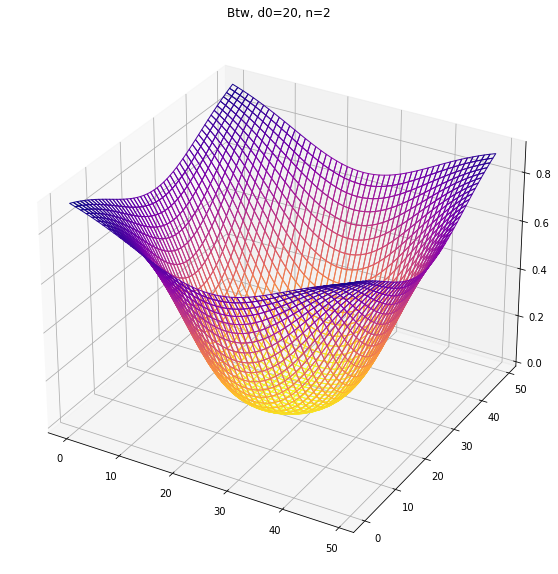

In [527]:
x,y , z = lpfilter('btw', 50,50, 20, 2)
x = np.arange(0,50,1)
y = np.arange(0,50,1)
x, y = np.meshgrid(x,y)

norm = plt.Normalize(z.min(), z.max())
colors = cm.plasma(norm(z))
rcount, ccount, _ = colors.shape

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, 1-z, rcount=rcount, ccount=ccount, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
ax.set_title(f'Btw, d0=20, n=2')
plt.show()

## 4.4.B

In [441]:
def nextpow2(N):
    """ Function for finding the next power of 2 """
    n = 1
    while n < N:
        n *= 2
    return n

def paddedsize(ab: np.ndarray, cd: np.ndarray = None, param: (str) = None):
    """
    Paddedsize is the equivalente to matlabs usually used one, it computes padded sizes
    useful for FFT-based filtering.
        pq = paddedsize(ab), where ab is a two-element size array, computes the two-element 
            size array pq = 2*ab.
        pq = paddedsize(ab, 'pwr2') computes the array pq such that:
             pq[0] = pq[1] = 2^nextpow2(2*m), where m is max(ab).
        pq = paddedsize(ab, cd), where ab and cd are two-element size arrays,
            computes the two-element size array pq. The elements of pq are the
            smallest even integers greater than or equal to ab + cd -1.
        pq = paddedsize(ab, cd, 'pwr2') computes the vector pq such that:
            pq[0] = pq[1] = 2^nextpow2(2*m), where m is max([ab, cb]).
    Args:
        ab (np.ndarray): two-element size array.
        cd (np.ndarray): two-element size array.
        param (str): 'pwr2' unique option.
    Returns:
        (np.ndarray): array with padded values
    """
    if (param is None) and (cd is None):
        return 2*ab
    elif param is None:
        pq = ab + cd -1
        return 2*np.ceil(pq/2)
    elif cd is None:
        m = ab.max()
        p = 2^nextpow2(2*m)
        return [p, p]
    else:
        m = np.array([ab.max(), cd.max()]).max()
        p = 2^nextpow2(2*m)
        return [p, p]

In [528]:
def filter_lena(lp, filter_type, cutoff, order = None):
    
    im = cv2.imread(f'./images/lena.png', cv2.IMREAD_GRAYSCALE)
    mn = np.array(im.shape)
    pq = paddedsize(mn)
    
    x, y, z = lpfilter(filter_type, pq[0], pq[1], cutoff, order)
    z = z if lp else 1-z
    im_p = np.zeros((pq[0], pq[1]))
    im_p[0:mn[0], 0:mn[1]] = im
    
    I = fft2(im_p)
    F = I*fftshift(z)
    im_filt_p = np.real(ifft2(F))
    im_filt = im_filt_p[0:mn[0], 0:mn[1]]
    
    fig = plt.figure(figsize=(15,5))
    
    ax = fig.add_subplot(1, 3, 1)
    ax.set_title('Original Image')
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    z_ds = z[::30,::30]
    x_ds = x[::30,::30]
    y_ds = y[::30,::30]
    norm = plt.Normalize(z_ds.min(), z_ds.max())
    colors = cm.plasma(norm(z_ds))
    rcount, ccount, _ = colors.shape
    surf = ax.plot_surface(
        x_ds, y_ds, z_ds,
        rcount=rcount, ccount=ccount, facecolors=colors, shade=False
    )
    surf.set_facecolor((0,0,0,0))
    ax.set_title(f'{filter_type.capitalize()}, d0={cutoff}, n={order}')
    
    ax = fig.add_subplot(1, 3, 3)
    ax.set_title('Filtered Image')
    ax.imshow(im_filt, cmap='gray')
    ax.axis('off')
    plt.show()

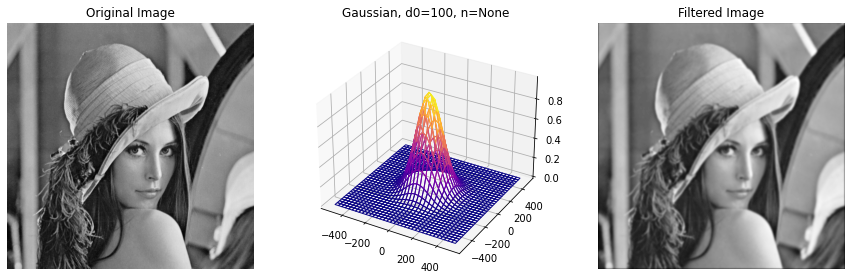

In [529]:
filter_lena(True, 'gaussian', 100)

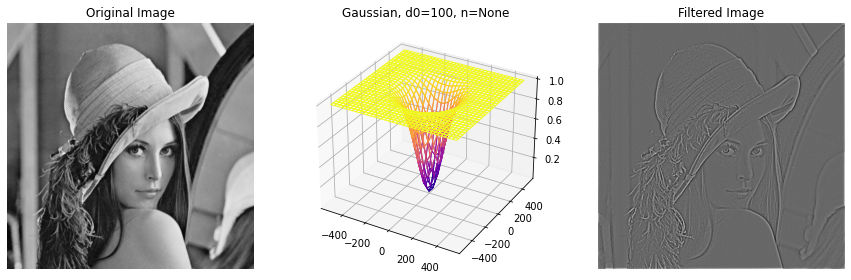

In [531]:
filter_lena(False, 'gaussian', 100)

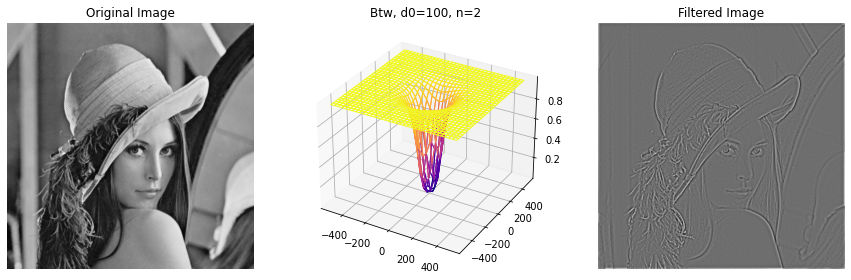

In [532]:
filter_lena(False, 'btw', 100, 2)

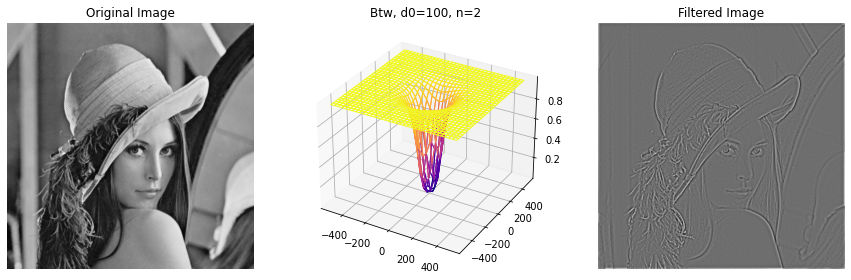

In [533]:
filter_lena(False, 'btw', 100, 2)